# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Импорт библиотек и модулей

In [33]:
pip install matrixprofile

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\myakotindi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
import pandas as pd
from sklearn.metrics import accuracy_score

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

In [61]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [62]:
#Поиск сниппетов
snp = snippets(ts, 600, 2)

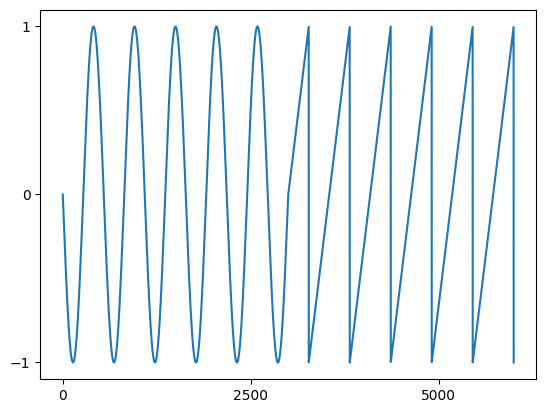

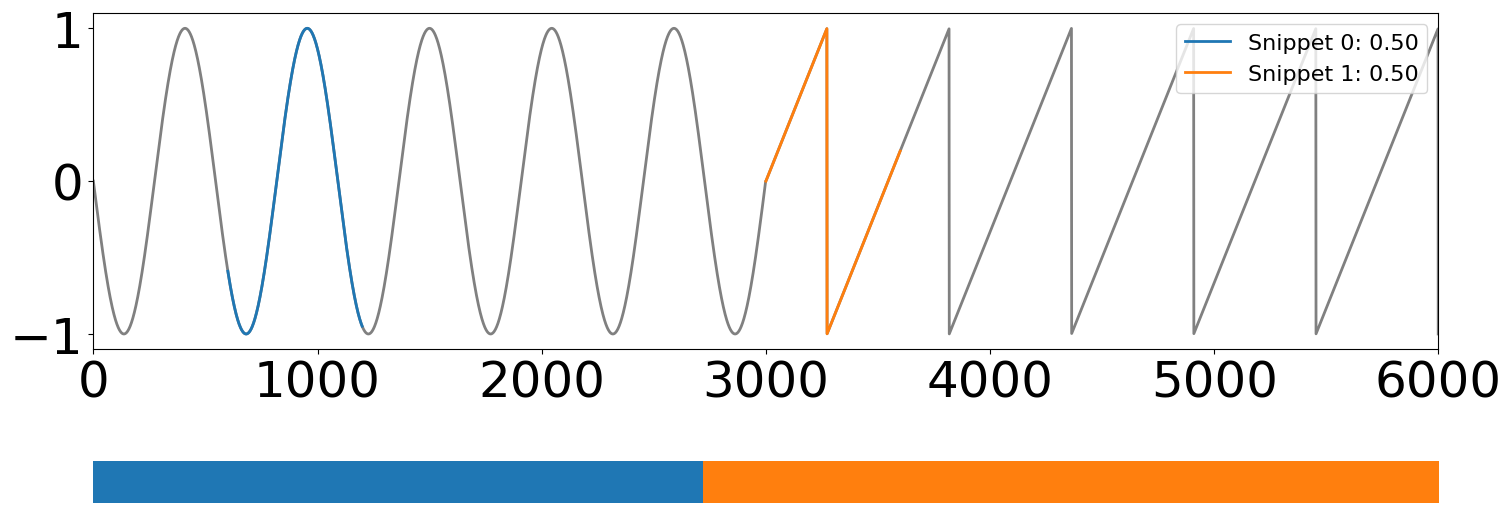

<Axes: >

In [63]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «X» (угол крена) на временном интервале от 950 сек. до 109 сек.** из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из модуля snippets.py.

In [64]:
df = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.875540,0.319610,9.10631,-1.642520,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.677900,0.379878,8.90965,-1.416770,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.441670,0.606483,8.89380,-1.236830,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.595650,0.772609,8.99907,-1.237530,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.827400,0.938327,9.21025,-1.419260,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145995,2305.66,4.0,NaN,35.6875,2.140840,7.09274,-0.213018,2.107840,7.31908,-0.041456,0.256645,-0.568124,0.005918,-12.27830,-50.9797,20.50000,0.566790,-0.673692,-0.347012,-0.323220
145996,2305.67,4.0,NaN,35.6875,2.027390,6.56647,-0.135921,2.015190,6.94196,-0.041992,0.221546,-0.501649,0.103945,-12.52640,-51.7445,20.64360,0.566736,-0.675315,-0.345593,-0.321443
145997,2305.68,4.0,NaN,35.6875,1.978930,6.11268,-0.445092,1.861420,6.39894,-0.027528,0.162119,-0.355711,0.133332,-11.76720,-51.6443,21.35340,0.566580,-0.676581,-0.344391,-0.320344
145998,2305.69,4.0,NaN,35.6875,1.677590,5.73813,-0.294450,1.707950,5.96165,-0.073210,0.122680,-0.262807,0.188172,-12.41520,-51.3625,21.34730,0.566308,-0.677672,-0.343209,-0.319786


In [65]:
start_time = 850
end_time = 890

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()
ts.shape

(3999,)

In [66]:
snp = snippets(ts, 600, 2)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

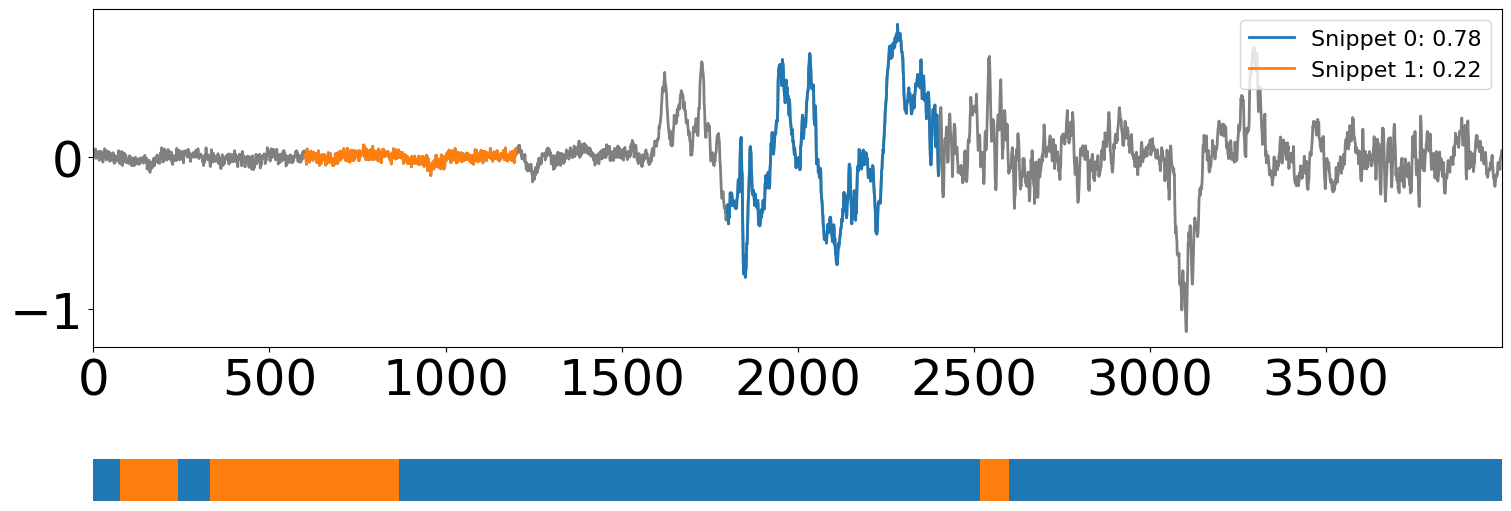

<Axes: >

In [67]:
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов.

In [68]:
labels_pred = np.zeros_like(ts)
for i, snippet in enumerate(snp):
    neighbors = np.array(snippet["neighbors"])
    for neighbor_index in neighbors:
        labels_pred[neighbor_index] = i


        

In [70]:
labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels = np.where(labels == 3, 1, labels)
labels = np.where(labels == 17, 0, labels)

accuracy_score(labels, labels_pred)

0.8969742435608902

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

C помощью сниппетов можно кластеризировать временные ряды

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1.

In [71]:
start_time = 850
end_time = 880

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10:13].to_numpy()
ts.shape

(2999, 3)

In [80]:
snpList=[]
for i in range(3):
    snpList.append(snippets(ts[:,i], 600, 2))

In [88]:
snpList

[[{'index': 1800,
   'snippet': array([-3.57008e-01, -3.13254e-01, -4.11429e-01, -4.39641e-01,
          -3.67973e-01, -3.98671e-01, -3.38349e-01, -3.20542e-01,
          -2.34965e-01, -2.76176e-01, -2.55428e-01, -2.43848e-01,
          -2.36301e-01, -2.51411e-01, -3.18007e-01, -2.95553e-01,
          -3.19954e-01, -3.00428e-01, -2.87496e-01, -2.99467e-01,
          -2.93098e-01, -3.13200e-01, -3.33607e-01, -3.29488e-01,
          -3.39657e-01, -3.35683e-01, -3.34263e-01, -2.80350e-01,
          -2.65390e-01, -2.58271e-01, -1.87254e-01, -1.47344e-01,
          -1.98228e-01, -2.25173e-01, -2.29954e-01, -1.48934e-01,
          -1.61509e-03,  7.35999e-02,  1.10103e-01,  1.30161e-01,
           2.06040e-02, -9.64014e-02, -1.09571e-01, -3.73737e-01,
          -5.03407e-01, -6.90512e-01, -7.68581e-01, -6.61160e-01,
          -6.45018e-01, -6.73644e-01, -7.64280e-01, -7.91426e-01,
          -7.50798e-01, -7.29641e-01, -6.71277e-01, -5.68859e-01,
          -5.70398e-01, -4.95563e-01, -4.00051e

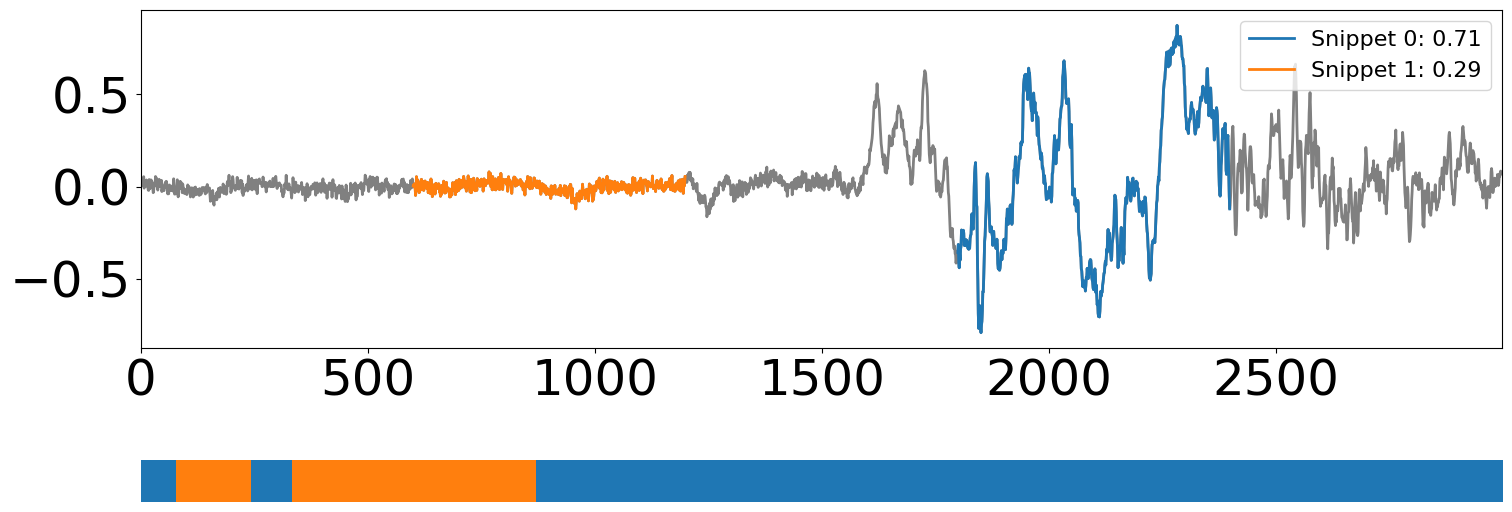

<Axes: >

In [79]:
plot_snippets(ts[:,0], snpList[0])

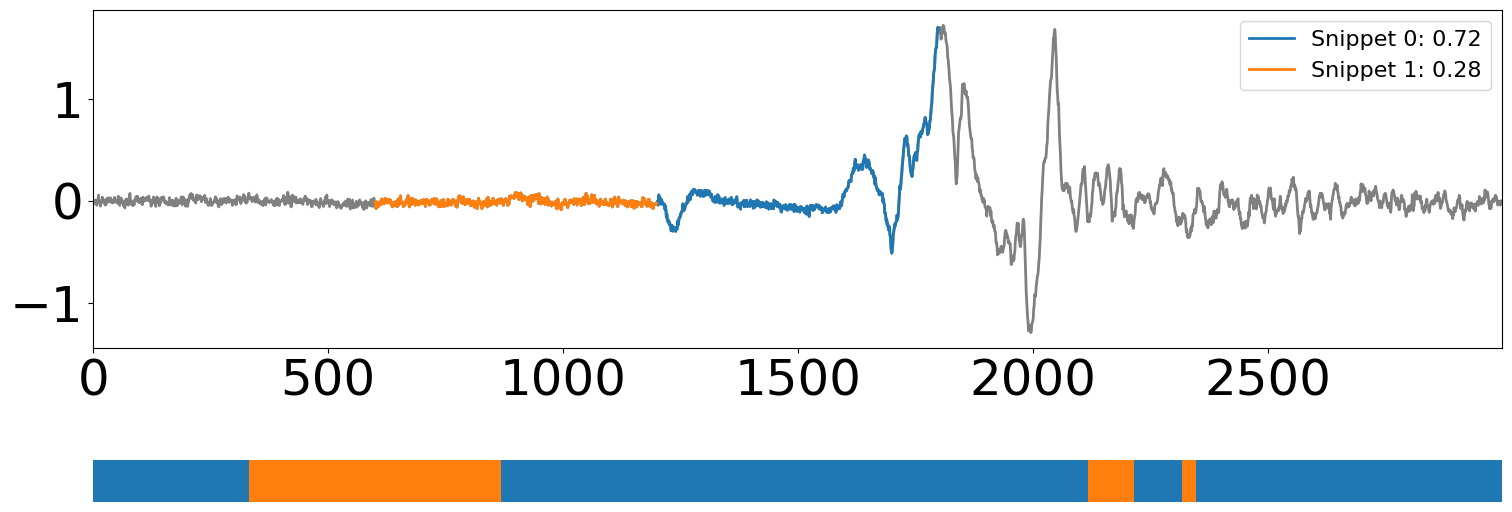

<Axes: >

In [81]:
plot_snippets(ts[:,1], snpList[1])

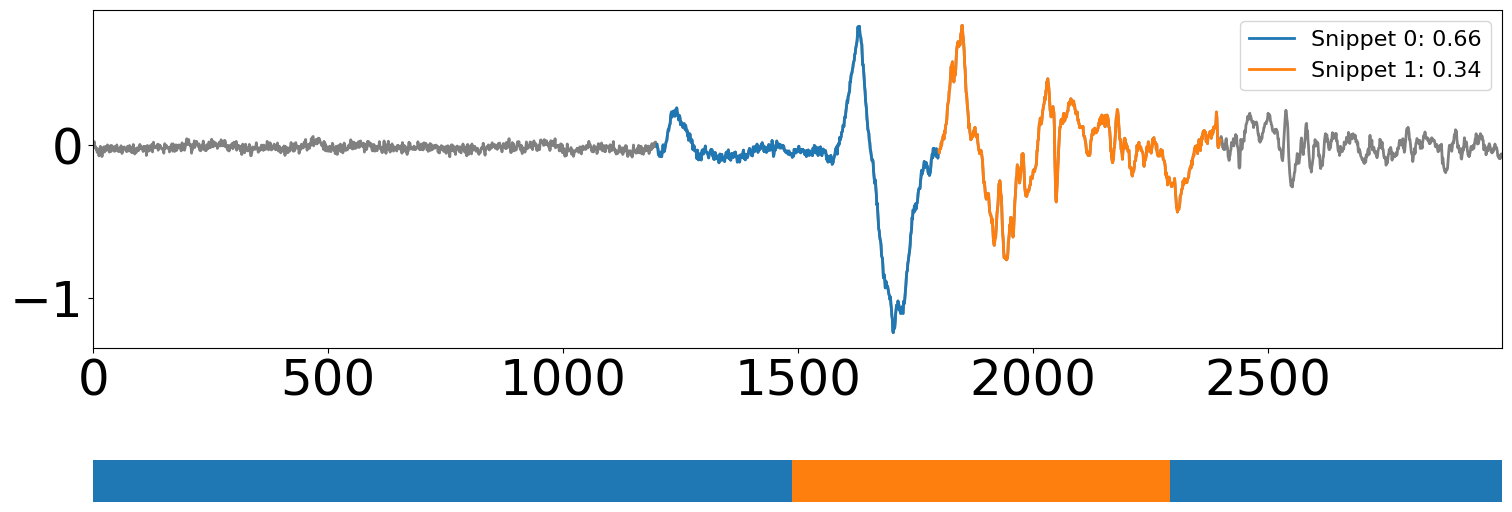

<Axes: >

In [82]:
plot_snippets(ts[:,2], snpList[2])

Оцените точность разметки, полученной при помощи сниппетов.

In [85]:
def get_label(labels_3d):
    labels = [0 for _ in range(len(labels_3d))]
    for i in range(len(labels_3d)):
        counter = {}
        for label in labels_3d[i]:
            if label in counter:
                counter[label] += 1
            else:
                counter[label] = 1
        labels[i] = max(counter, key=counter.get)
    return labels

In [86]:
labels = np.zeros_like(ts)
for i, snp_1d in enumerate(snp):
    for j, snippet in enumerate(snp_1d):
        neighbors = np.array(snippet["neighbors"])
        for neighbor_index in neighbors:
            labels[neighbor_index][i] = j
         
labels_pred = get_label(labels)

labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels = np.where(labels == 3, 1, labels)
labels = np.where(labels == 17, 0, labels)

In [87]:
accuracy_score(labels, labels_pred)

0.8012670890296766

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
import pandas as pd

df = pd.read_csv(r'datasets/PAMAP/PAMAP.txt', sep=' ', header=None).T

In [ ]:
start_time = 850
end_time = 880

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()
ts.shape

(2999,)

In [ ]:
stumpy.snippets(ts, 500, 2)[4]

array([77923.7904287 , 69580.57835581])

In [ ]:
stumpy.snippets(ts, 500, 3)[4]

array([77923.7904287 , 69580.57835581, 67522.90985561])

In [ ]:
stumpy.snippets(ts, 500, 8)[4]

array([77923.7904287 , 69580.57835581, 67522.90985561, 66544.17915662,
       66301.58427416, 66301.58427416, 66301.58427416, 66301.58427416])

In [ ]:
import stumpy

k = 9
snippets = stumpy.snippets(ts, 500, k)
prof_area = snippets[4]
prof_area

array([77923.7904287 , 69580.57835581, 67522.90985561, 66544.17915662,
       66301.58427416, 66301.58427416, 66301.58427416, 66301.58427416,
       66301.58427416])

In [ ]:
change = []
for i in range(1, 9):
    change.append(prof_area[i-1] / prof_area[i] - 1)

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [ ]:
import plotly.express as px

df = pd.DataFrame([range(1, 10), prof_area]).T
df.columns = ['k', 'ProfileArea']
px.bar(df, x='k', y='ProfileArea', labels={'k':'k', 'ProfileArea':'ProfileArea'})

In [ ]:
df = pd.DataFrame([range(2, 10), change]).T
df.columns = ['k', 'Change']
px.bar(df, x='k', y='Change', labels={'k':'k', 'Change':'Change'})

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?

**Наилучшее значение k = 2 для данного многомерного ряда. Это действительно так, если сверять с разметкой из набора данных.**